In [79]:
import numpy as np
import pandas as pd
import torch
import transformers as ppb # pytorch transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel

from transformers import pipeline

In [73]:
df = pd.read_excel(r"Data_600_Labeled_Final.xlsx")
df['innovation_num']=df.YN_INNOVATION.eq('yes').mul(1)

In [74]:
df = df.sort_values(by='YN_INNOVATION', ascending=False)
df

,Unnamed: 0,an,title,snippet,body,full_text,"Does it mention an innovation (yes,no,unsure)?",What is the company?,"Where is company mentioned (title,body,snippet,all)?",What is the product name?,"Where is the product name mentioned(title,body,snippet,all)","What could indicate that this is a product (for use in our algorithms, e.g. TM,R,C,CAPITAL LETTERS, Quotes,Used with certain key phrases or words etc.)?","Features of the product, if mentioned",assignee,YN_INNOVATION,innovation_num
0,0,PNN0000020180426ee4p00006,Creaform and Metrologic Group Announce Worldwi...,Metrologic Group and Creaform have entered int...,Speed and volumetric accuracy\n\nThe CUBE-R™ e...,Creaform and Metrologic Group Announce Worldwi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,yes,1
515,515,PZON000020210113eh1d0003z,SwarmConnect Launches Video Conferencing for V...,SwarmConnect Launches Video Conferencing for V...,"SwarmConnect, in conjunction with DeepSkyConne...",SwarmConnect Launches Video Conferencing for V...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,yes,1
462,462,BWR0000020171003eda3000a5,Conga Launches Enterprise Edition of Conga Con...,Unveiled at Conga Connect user conference in L...,"Conga, an application provider for companies l...",Conga Launches Enterprise Edition of Conga Con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,yes,1
229,229,BWR0000020160426ec4q000dz,Skyjet Max Enables Instant Booking of Private ...,\n -- Enhanced Skyjet App features industry-...,This Smart News Release features multimedia. V...,Skyjet Max Enables Instant Booking of Private ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,yes,1
227,227,INVWK00020200828eg8s0008l,unitQ; Drive Product Quality and Revenue from ...,2020 SEP 5 (VerticalNews) -- By a News Reporte...,unitQ helps teams find and fix product issues ...,unitQ; Drive Product Quality and Revenue from ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,JPSTEN0020151217ebcg000e5,United States : Frost & Sullivan Applauds Redp...,Based on its recent analysis of the Internet o...,The WyzBee platform offers more than 40 periph...,United States : Frost & Sullivan Applauds Redp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,no,0
237,237,MDLSBRDN20191114efbe0002x,MARH Home Health named to Top 500 of the 2019 ...,Middlesboro ARH Home Health announced that it ...,“We're pleased to recognize Middlesboro ARH Ho...,MARH Home Health named to Top 500 of the 2019 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,no,0
236,236,BTRR000020161024ecao0000b,"Salient CRGT, Inc. Salient CRGT Awarded $22.6M...",2016 OCT 24 (NewsRx) -- By a News Reporter-Sta...,The objective of BorderRITE is to provide two ...,"Salient CRGT, Inc. Salient CRGT Awarded $22.6M...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,no,0
599,599,BWR0000020170710ed7a0009v,Protivix Hires Chad Ehmke and Launches Special...,"\nFRISCO, Texas--(BUSINESS WIRE)--July 10, 201...",Protivix's initial offerings will include solu...,Protivix Hires Chad Ehmke and Launches Special...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,no,0


In [75]:
df2 = df[223:].sample(n=222)
df2

,Unnamed: 0,an,title,snippet,body,full_text,"Does it mention an innovation (yes,no,unsure)?",What is the company?,"Where is company mentioned (title,body,snippet,all)?",What is the product name?,"Where is the product name mentioned(title,body,snippet,all)","What could indicate that this is a product (for use in our algorithms, e.g. TM,R,C,CAPITAL LETTERS, Quotes,Used with certain key phrases or words etc.)?","Features of the product, if mentioned",assignee,YN_INNOVATION,innovation_num
508,508,BWR0000020191008efa800009,Glancy Prongay & Murray LLP Files a Securities...,"\nLOS ANGELES--(BUSINESS WIRE)--October 07, 20...",Investors are hereby notified that they have 6...,Glancy Prongay & Murray LLP Files a Securities...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,no,0
139,139,GLBGAZET20200315eg3d0000n,On Smartmatic voting machines:,CLAIM: Billionaire philanthropist George Soros...,A post circulating on Facebook featuring a pho...,On Smartmatic voting machines: CLAIM: Billiona...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,no,0
100,100,UWIR000020201218egch00071,How To help you Get At no cost Like Slot machi...,Chattanooga State Technical Community College;...,How To help you Get At no cost Like Slot machi...,How To help you Get At no cost Like Slot machi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,TOSS,0
460,460,MRKWC00020170918ed9i00001,Snapchat blocks Al Jazeera channel from users ...,Saudi government continues to pressure Qatar a...,Al Jazeera’s Arabic-language channel in Snapch...,Snapchat blocks Al Jazeera channel from users ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,no,0
336,336,COMWKN0020130802e9880002e,"Computers, Software; Centage Corporation Unvei...",2013 AUG 8 (VerticalNews) -- By a News Reporte...,"According to industry research, financial budg...","Computers, Software; Centage Corporation Unvei...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,450,RPIN000020181007eea70000c,Viewpoint Bestsellers,Bestsellers compiled from Viewpoint Books in d...,"Children and Young Adult\n\n1. ""Lord of the Fl...",Viewpoint Bestsellers Bestsellers compiled fro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,no,0
81,81,AUSTLN0020171222edcn0001f,HNA faces US probe over its Beijing ties,US politicians are calling for a ­national sec...,A spokesman for the Chinese firm said HNA disp...,HNA faces US probe over its Beijing ties US po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,no,0
311,311,INVDAI0020170531ed5v000bl,IBD 50 Stock Control4 Rated Buy; Zebra Tech Cu...,Two IBD 50 stocks moved in opposite directions...,Control4 and Zebra are on the IBD 50 list of t...,IBD 50 Stock Control4 Rated Buy; Zebra Tech Cu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,no,0
140,140,INVDAI0020130829e98r00002,Facebook Leads 5 Top Big Caps That Are Recent ...,"Facebook (FB), LinkedIn (LNKD) and Qihoo 360 T...",A second sort shows the top five Big Caps that...,Facebook Leads 5 Top Big Caps That Are Recent ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,no,0


In [76]:
df.drop(df.tail(378).index, inplace = True)
df

,Unnamed: 0,an,title,snippet,body,full_text,"Does it mention an innovation (yes,no,unsure)?",What is the company?,"Where is company mentioned (title,body,snippet,all)?",What is the product name?,"Where is the product name mentioned(title,body,snippet,all)","What could indicate that this is a product (for use in our algorithms, e.g. TM,R,C,CAPITAL LETTERS, Quotes,Used with certain key phrases or words etc.)?","Features of the product, if mentioned",assignee,YN_INNOVATION,innovation_num
0,0,PNN0000020180426ee4p00006,Creaform and Metrologic Group Announce Worldwi...,Metrologic Group and Creaform have entered int...,Speed and volumetric accuracy\n\nThe CUBE-R™ e...,Creaform and Metrologic Group Announce Worldwi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,yes,1
515,515,PZON000020210113eh1d0003z,SwarmConnect Launches Video Conferencing for V...,SwarmConnect Launches Video Conferencing for V...,"SwarmConnect, in conjunction with DeepSkyConne...",SwarmConnect Launches Video Conferencing for V...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,yes,1
462,462,BWR0000020171003eda3000a5,Conga Launches Enterprise Edition of Conga Con...,Unveiled at Conga Connect user conference in L...,"Conga, an application provider for companies l...",Conga Launches Enterprise Edition of Conga Con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,yes,1
229,229,BWR0000020160426ec4q000dz,Skyjet Max Enables Instant Booking of Private ...,\n -- Enhanced Skyjet App features industry-...,This Smart News Release features multimedia. V...,Skyjet Max Enables Instant Booking of Private ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,yes,1
227,227,INVWK00020200828eg8s0008l,unitQ; Drive Product Quality and Revenue from ...,2020 SEP 5 (VerticalNews) -- By a News Reporte...,unitQ helps teams find and fix product issues ...,unitQ; Drive Product Quality and Revenue from ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,21,COMWKN0020130621e96r000wy,SmartBear Software; New TestComplete Extends S...,2013 JUN 27 (VerticalNews) -- By a News Report...,"""Sencha Ext JS is the leading standard for bus...",SmartBear Software; New TestComplete Extends S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,yes,1
142,142,WLNW000020130723e97n00058,Spanning Reports Summer '13 Release of Spannin...,"Spanning Cloud Apps, Inc., creators of the ent...","In a release, the company noted that with back...",Spanning Reports Summer '13 Release of Spannin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,yes,1
118,118,ATINVT0020171014edad0008f,Smith Micro Announces the Launch of SafePath F...,"Oct. 13 -- Smith Micro Software, Inc. (NASDAQ:...",The SafePath Family platform brings to the mar...,Smith Micro Announces the Launch of SafePath F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,yes,1
596,596,TELWK00020130531e96500010,Transaction Network Services; TNS Unveils Uniq...,2013 JUN 5 (VerticalNews) -- By a News Reporte...,TNS has partnered with leading mobile and land...,Transaction Network Services; TNS Unveils Uniq...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,yes,1


In [77]:
df = df.append(df2)
df

,Unnamed: 0,an,title,snippet,body,full_text,"Does it mention an innovation (yes,no,unsure)?",What is the company?,"Where is company mentioned (title,body,snippet,all)?",What is the product name?,"Where is the product name mentioned(title,body,snippet,all)","What could indicate that this is a product (for use in our algorithms, e.g. TM,R,C,CAPITAL LETTERS, Quotes,Used with certain key phrases or words etc.)?","Features of the product, if mentioned",assignee,YN_INNOVATION,innovation_num
0,0,PNN0000020180426ee4p00006,Creaform and Metrologic Group Announce Worldwi...,Metrologic Group and Creaform have entered int...,Speed and volumetric accuracy\n\nThe CUBE-R™ e...,Creaform and Metrologic Group Announce Worldwi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,yes,1
515,515,PZON000020210113eh1d0003z,SwarmConnect Launches Video Conferencing for V...,SwarmConnect Launches Video Conferencing for V...,"SwarmConnect, in conjunction with DeepSkyConne...",SwarmConnect Launches Video Conferencing for V...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,yes,1
462,462,BWR0000020171003eda3000a5,Conga Launches Enterprise Edition of Conga Con...,Unveiled at Conga Connect user conference in L...,"Conga, an application provider for companies l...",Conga Launches Enterprise Edition of Conga Con...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,yes,1
229,229,BWR0000020160426ec4q000dz,Skyjet Max Enables Instant Booking of Private ...,\n -- Enhanced Skyjet App features industry-...,This Smart News Release features multimedia. V...,Skyjet Max Enables Instant Booking of Private ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,yes,1
227,227,INVWK00020200828eg8s0008l,unitQ; Drive Product Quality and Revenue from ...,2020 SEP 5 (VerticalNews) -- By a News Reporte...,unitQ helps teams find and fix product issues ...,unitQ; Drive Product Quality and Revenue from ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,450,RPIN000020181007eea70000c,Viewpoint Bestsellers,Bestsellers compiled from Viewpoint Books in d...,"Children and Young Adult\n\n1. ""Lord of the Fl...",Viewpoint Bestsellers Bestsellers compiled fro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aditi,no,0
81,81,AUSTLN0020171222edcn0001f,HNA faces US probe over its Beijing ties,US politicians are calling for a ­national sec...,A spokesman for the Chinese firm said HNA disp...,HNA faces US probe over its Beijing ties US po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,no,0
311,311,INVDAI0020170531ed5v000bl,IBD 50 Stock Control4 Rated Buy; Zebra Tech Cu...,Two IBD 50 stocks moved in opposite directions...,Control4 and Zebra are on the IBD 50 list of t...,IBD 50 Stock Control4 Rated Buy; Zebra Tech Cu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,no,0
140,140,INVDAI0020130829e98r00002,Facebook Leads 5 Top Big Caps That Are Recent ...,"Facebook (FB), LinkedIn (LNKD) and Qihoo 360 T...",A second sort shows the top five Big Caps that...,Facebook Leads 5 Top Big Caps That Are Recent ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diggy,no,0


In [87]:
## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
model_class, tokenizer_class, pretrained_weights = (AutoModel, AutoTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [88]:
tokenized = df['full_text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, padding=True, 
                                                              truncation=True,max_length=512)))

SyntaxError: unexpected EOF while parsing (<ipython-input-88-cdc8946f2efd>, line 2)

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [89]:
np.array(padded).shape

NameError: name 'padded' is not defined

In [90]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

NameError: name 'padded' is not defined

In [30]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [31]:
features = last_hidden_states[0][:,0,:].numpy()

In [32]:
labels = df['innovation_num']

In [33]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [34]:
lr_clf = LogisticRegression(solver="sag")
lr_clf.fit(train_features, train_labels)

/home/am8hf/.conda/envs/AM_BERT/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

In [35]:
lr_clf.score(test_features, test_labels)

0.8035714285714286

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


#Create test splits and logistic regression
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

lgr = LogisticRegression(solver="sag")
lgr.fit(train_features, train_labels)

# Save predicted values and predicted value probabilities (prob of being classed "+")
pred = lgr.predict(test_features)
pred_prob = lgr.predict_proba(test_features)[:, 1]


print("Test accuracy:")
print(lgr.score(test_features,test_labels))
print("Vector with coefficient values for theta_1, theta_2")
print("theta_0:",lgr.intercept_[0],"theta_1, theta_2: = ",lgr.coef_[0])

Test accuracy:
0.8303571428571429
Vector with coefficient values for theta_1, theta_2
theta_0: -0.089766264 theta_1, theta_2: =  [ 0.04430427 -0.0734126   0.2520296   0.03986788 -0.23271239 -0.40580493
  0.29057038 -0.23413628 -0.1356943  -0.02787371 -0.25406194 -0.37192982
 -0.37280646  0.13716678  0.01213246 -0.30222318  0.2449704  -0.12921815
  0.09979901 -0.17887013  0.1725822   0.2687049  -0.02445502  0.12152652
  0.146142   -0.13826856  0.2663289   0.1269404  -0.09770346 -0.10027917
 -0.11448589 -0.04570841  0.4082406  -0.20608857  0.13630077  0.2653001
  0.2151469   0.11298668 -0.24533275 -0.18524842 -0.26593363 -0.3268756
  0.132145   -0.11928358 -0.05922034 -0.07207778 -0.25354025 -0.04039915
  0.18316656 -0.54597795  0.08086242 -0.27928266  0.13724896 -0.13617726
 -0.50832963 -0.21331133  0.05046766 -0.11791801 -0.08963853  0.3732945
 -0.22772409  0.08094426 -0.09828502  0.21792553 -0.27160928  0.20122133
 -0.3289272   0.5655861  -0.25199482 -0.13611639  0.14318496  0.3992709

/home/am8hf/.conda/envs/AM_BERT/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [37]:
print(pred_prob)

[1.2443717e-01 1.8235841e-01 8.8208413e-01 1.1259415e-01 4.9557991e-04
 1.7352484e-03 3.8006525e-02 3.6175001e-01 3.8358283e-01 6.3234794e-01
 8.6966240e-01 7.8665474e-03 1.3466337e-02 8.9692205e-01 5.2945577e-02
 6.9887239e-01 9.7577220e-01 2.8180888e-01 9.9284512e-01 4.2389584e-01
 5.1087409e-02 9.9487829e-01 6.6553921e-02 3.7310030e-02 3.2288110e-01
 1.7717455e-03 1.5309962e-02 8.2811046e-01 7.3530668e-01 8.9489931e-01
 7.9970591e-02 9.1620588e-01 8.6109608e-01 3.4228987e-01 9.9980336e-01
 4.8484470e-04 1.5336613e-02 1.1370514e-03 1.7320499e-03 6.4026248e-01
 9.8640084e-01 8.2331717e-01 6.3559800e-02 6.1251293e-03 5.7134086e-01
 2.7886364e-01 1.6898794e-02 8.0941397e-01 9.1031110e-01 1.2016284e-01
 4.9914068e-01 1.5377046e-01 3.3197098e-03 9.4314808e-01 9.2203194e-01
 9.9912852e-01 8.4298681e-03 8.0123037e-01 2.7444487e-02 1.1336630e-03
 9.5790261e-01 6.7700809e-01 2.8604037e-01 9.6909183e-01 9.1720531e-03
 1.5105698e-01 8.0061543e-01 3.5670668e-02 9.9455500e-01 6.7890865e-01
 8.516

In [40]:
print(test_labels)

407    0
394    0
26     1
92     1
528    0
      ..
24     1
402    0
166    1
170    0
568    0
Name: innovation_num, Length: 112, dtype: int64


Text(0.5, 1.0, 'Innovation Data ROC Curve; AUC=0.8769')

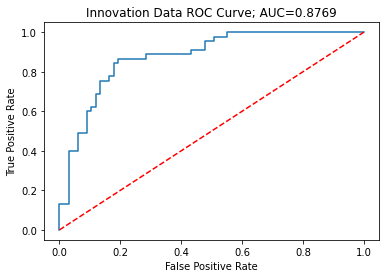

In [41]:
# ROC Graph
fpr, tpr, thresholds = roc_curve(test_labels, pred_prob)
auc = roc_auc_score(test_labels, pred_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Innovation Data ROC Curve; AUC={}".format(round(auc, 4)))

Accuracy: 0.8303571428571429
Precision: 0.75
Recall: 0.8666666666666667
F1: 0.8041237113402062
[[54 13]
 [ 6 39]]


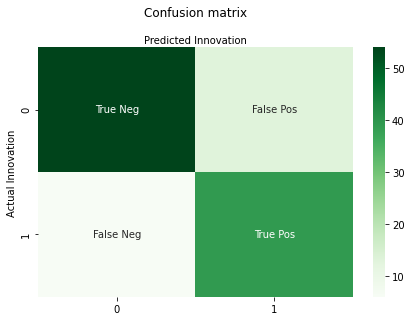

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

from sklearn import metrics
cm = metrics.confusion_matrix(test_labels, pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(pd.DataFrame(cm), annot=labels, cmap="Greens" ,fmt='')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Innovation')
plt.xlabel('Predicted Innovation')

print("Accuracy:",metrics.accuracy_score(test_labels, pred))
print("Precision:",metrics.precision_score(test_labels, pred))
print("Recall:",metrics.recall_score(test_labels, pred))
print("F1:", metrics.f1_score(test_labels, pred))
print(cm)

In [45]:
pred
#cross check this with test_labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0])

In [48]:
test_labels

407    0
394    0
26     1
92     1
528    0
      ..
24     1
402    0
166    1
170    0
568    0
Name: innovation_num, Length: 112, dtype: int64

Text(0.5, 15.0, 'Predicted Innovation')

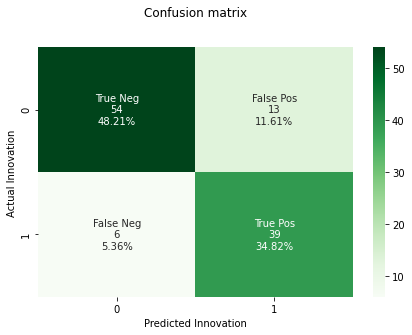

In [43]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Innovation')
plt.xlabel('Predicted Innovation')

In [54]:
print(df.loc[[26]])

    Unnamed: 0                         an  \
26          26  EDULTR0020170322ed3m0000z   

                                                title  \
26  LearningCart; LearningCart Upgrades Its All-In...   

                                              snippet  \
26  2017 MAR 22 (VerticalNews) -- By a News Report...   

                                                 body  \
26  Initially launched in 2012, LearningCart provi...   

                                            full_text  \
26  LearningCart; LearningCart Upgrades Its All-In...   

    Does it mention an innovation (yes,no,unsure)?  What is the company?  \
26                                             NaN                   NaN   

    Where is company mentioned (title,body,snippet,all)?  \
26                                                NaN      

    What is the product name?  \
26                        NaN   

    Where is the product name mentioned(title,body,snippet,all)  \
26                                       